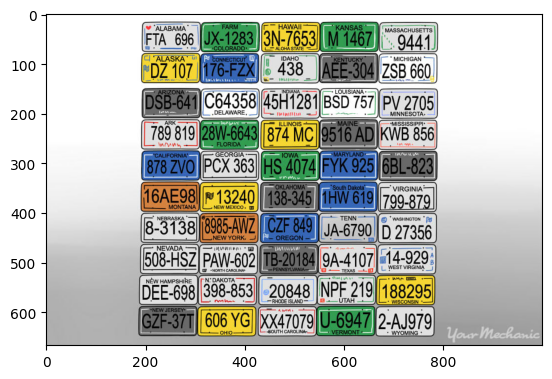

In [4]:
import codeprojectai.core as cpai
from PIL import Image, ImageDraw,ImageFont
from io import BytesIO
#import pprint
import matplotlib.pyplot as plt
import matplotlib
import base64

IP = 'localhost'
PORT = '32168'
TIMEOUT = 20 # Default is 10


cpaiobject = cpai.CodeProjectAILicensePlateReader(ip=IP, port=PORT, timeout=TIMEOUT)

image_path = 'tests/images/license_plates.jpeg'
im = Image.open(image_path)
plt.imshow(im)



In [2]:
try:
    with open(image_path, 'rb') as image_bytes:
        response = cpaiobject.read_plate(image_bytes)
        print(response)
        #im = Image.open(BytesIO(base64.b64decode(response['imageBase64'])))
        #plt.imshow(im);
except cpai.CodeProjectAIException as exc:
    print(exc)

{'predictions': [{'confidence': 0.8939028382301331, 'label': 'Plate: 874 MC', 'plate': '874 MC', 'x_min': 431, 'y_min': 213, 'x_max': 546, 'y_max': 268}, {'confidence': 0.9904820919036865, 'label': 'Plate: RHODEISLAND', 'plate': 'RHODEISLAND', 'x_min': 429, 'y_min': 571, 'x_max': 545, 'y_max': 620}, {'confidence': 0.9933881163597107, 'label': 'Plate: XX47079', 'plate': 'XX47079', 'x_min': 427, 'y_min': 597, 'x_max': 545, 'y_max': 646}, {'confidence': 0.996089518070221, 'label': 'Plate: ZSB 660', 'plate': 'ZSB 660', 'x_min': 674, 'y_min': 77, 'x_max': 785, 'y_max': 135}, {'confidence': 0.997774600982666, 'label': 'Plate: 2 AJ979', 'plate': '2 AJ979', 'x_min': 662, 'y_min': 589, 'x_max': 782, 'y_max': 649}, {'confidence': 0.944948673248291, 'label': 'Plate: NEWJE', 'plate': 'NEWJE', 'x_min': 189, 'y_min': 574, 'x_max': 303, 'y_max': 625}, {'confidence': 0.9660190939903259, 'label': 'Plate: BSD 757', 'plate': 'BSD 757', 'x_min': 553, 'y_min': 150, 'x_max': 667, 'y_max': 199}, {'confidence

['/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf']


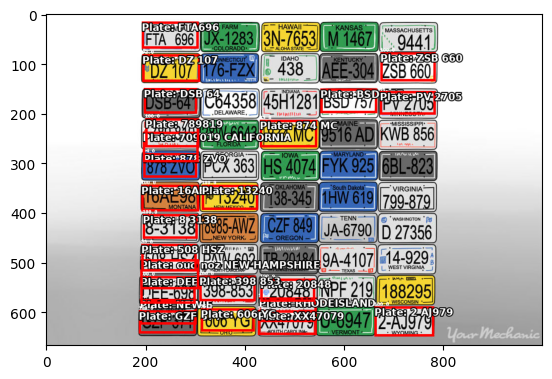

In [12]:
predictions = response["predictions"]
#print(object)

 # Draw each bounding box that was returned by the AI engine
draw = ImageDraw.Draw(im)

fontsize = 20

system_fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
#print(system_fonts)
font = ImageFont.truetype("DejaVuSans-Bold.ttf", fontsize)

for object in predictions:
    label = object["label"]
    conf  = object["confidence"]
    y_max = int(object["y_max"])
    y_min = int(object["y_min"])
    x_max = int(object["x_max"])
    x_min = int(object["x_min"])

    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=5)
    draw.text((x_min, y_min), f"{label}", font=font, stroke_width=2, stroke_fill="black")
    draw.text((x_min, y_min - 10), f"{round(conf*100.0,0)}")

plt.imshow(im);